In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
#from statsmodels.compat.python import iter_keys

In [3]:
#import pmdarima

In [4]:
airline = pd.read_csv('AirPassengers.csv', parse_dates = True, index_col = 'Month')

In [5]:
airline.head(3)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [6]:
len(airline)

144

In [7]:
#to store all the Null values
a = airline.loc[airline['#Passengers'].isnull()== True,:]

<AxesSubplot:xlabel='Month'>

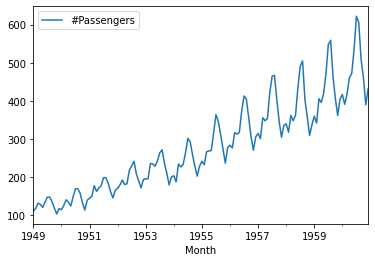

In [8]:
airline.plot()
#we can see, we have a trend here. Now, we need to check stationarity.
#this data is not stationary as mean and variance is not constant over the time period; 
#it can be ssen visually that trend is upward

In [9]:
#to check stationery of the data mathematically, we have 2 ways:
#1. rolling Mean 2. ADFC method

In [10]:
#ROLLING STATISTICS
rolmean = airline.rolling(window = 12).mean()
rolstd = airline.rolling(window = 12).std()

In [11]:
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


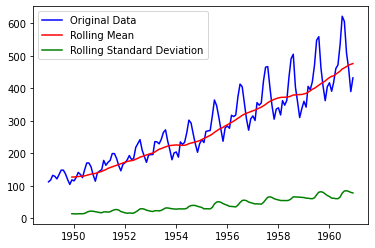

In [12]:
plt.plot(airline, color = 'blue', label = 'Original Data')
plt.plot(rolmean, color='red', label = 'Rolling Mean')
plt.plot(rolstd, color = 'green', label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')

In [13]:
#hence with the help of rolling mean we can see that data is not stationary as the deviation and mean
#are not constant over the period of time

In [14]:
#2. Dickey-Fuller Test for checking stationarity of the dataset
from statsmodels.tsa.stattools import adfuller


In [15]:
dftest = adfuller(airline['#Passengers'], autolag = 'AIC')



In [16]:
dftest

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
dfout = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value

print(dfout)

Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [18]:
#we cannot reject null hypothesis and say data is stationary--> data is not statioanry

In [19]:
#Now we perform transformations to convert the non stationary data into stationary.

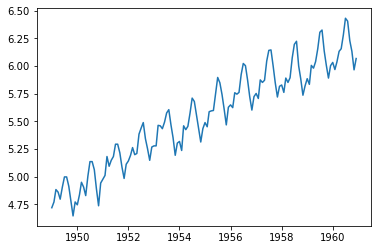

In [20]:
airline_log = np.log(airline)
plt.plot(airline_log)

In [21]:
#after log transformations we will perform rolling mean to check stationarity of the data
#ROLLING STATISTICS
rolmean_log = airline_log.rolling(window = 12).mean()
rolstd_log = airline_log.rolling(window = 12).std()

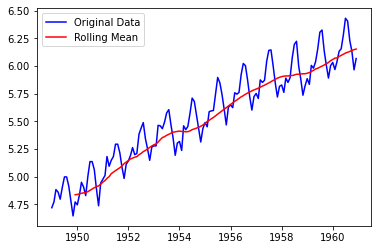

In [22]:
plt.plot(airline_log, color = 'blue', label = 'Original Data')
plt.plot(rolmean_log, color='red', label = 'Rolling Mean')
#plt.plot(rolstd_log, color = 'green', label = 'Rolling Standard Deviation')
plt.legend(loc = 'best')

In [23]:
#trend is same but y axis range is change
#but data is not stationary again

In [24]:
airline_diff = airline_log - rolmean_log
airline_diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [25]:
airline_diff.dropna(inplace = True)

In [26]:
airline_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    airplane_log_mean = timeseries.rolling(window = 12).mean()
    airplane_log_std = timeseries.rolling(window = 12).std()
    
    plt.plot(timeseries, color = 'blue', label ='Original')
    plt.plot(airplane_log_mean, color = 'red', label = 'Mean')
    plt.plot(airplane_log_std, color = 'black', label = 'Stdev')
    plt.legend(loc = 'best')
     
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Stats','p-value','#Lags used','total observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
    

Test Stats               -3.162908
p-value                   0.022235
#Lags used               13.000000
total observations      119.000000
Critical value (1%)      -3.486535
Critical value (5%)      -2.886151
Critical value (10%)     -2.579896
dtype: float64


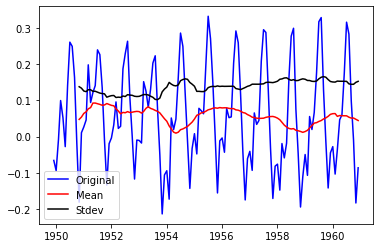

In [28]:
test_stationarity(airline_diff)

In [29]:
#we can see there is no trend
#P value is relatively less
# now we can see that data is stationary

In [30]:
# we use another approach to make data stationary
exponetail_airline = airline_log.ewm(halflife = 12, min_periods = 0, adjust = True).mean()


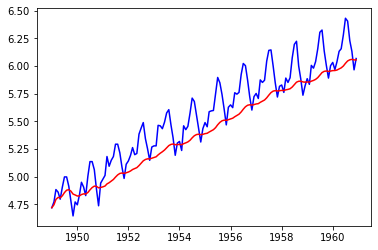

In [31]:
plt.plot(airline_log, color = 'blue', label ='Original')
plt.plot(exponetail_airline, color = 'red', label = 'Mean')
#plt.plot(airplane_log_std, color = 'black', label = 'Stdev')

In [32]:
#trend is upward hence we do transformations+
airline_diff_Exp = airline_log - exponetail_airline

Test Stats               -3.601262
p-value                   0.005737
#Lags used               13.000000
total observations      130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


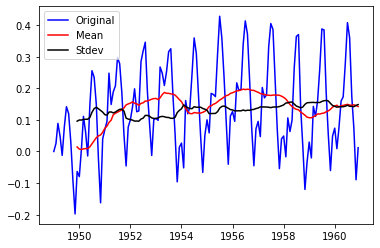

In [33]:
test_stationarity(airline_diff_Exp)

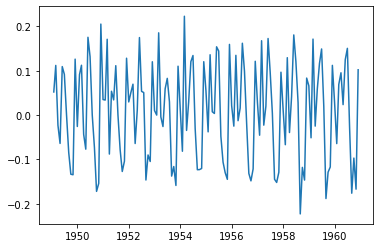

In [34]:
#we can see std ev is flat hence stationary... p is less
# now we got 2 stationary time series data hence we use shift in order to use it in forecasting of time series
airplane_shift = airline_log - airline_log.shift()
plt.plot(airplane_shift)

Test Stats               -2.717131
p-value                   0.071121
#Lags used               14.000000
total observations      128.000000
Critical value (1%)      -3.482501
Critical value (5%)      -2.884398
Critical value (10%)     -2.578960
dtype: float64


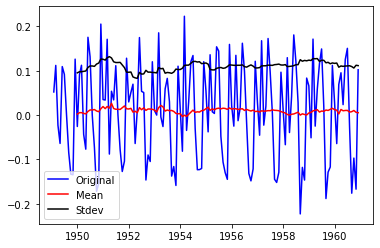

In [35]:
airplane_shift.dropna(inplace = True)
test_stationarity(airplane_shift)
#shift by 1
#timeseries is staionary
#to make a time series stationary the easiest method is to shift 

In [36]:
#ARIMA model

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decompose data into 3 parts trend, seasonal and residual
decomposition = seasonal_decompose(airline_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



In [38]:
residual

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [41]:
#data is stationary
#value of d is known
#now we find value of p and q i.e. value of autoregressive lags and moving average, hence we need to plot Pacf and acf graph
#pacf for p value and acf for q value
#acf is correlation graph
#pacf is auto correlation graph
#

/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


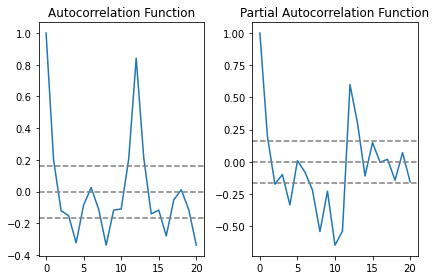

In [42]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(airplane_shift, nlags = 20)
lag_pacf = pacf(airplane_shift, nlags = 20, method = 'ols')

#plot ACF

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(airplane_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(airplane_shift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#plot PACF


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(airplane_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(airplane_shift)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [43]:
# from the above graph we can find out our p and q values.
#in partial coorelation the value drops to 0 at near about 2 hence p value is 2
#in auto corelation graph the value drops to 0 at near about 2 as well hence q value is 2
#now we have value of p, q, d :: p=2 q=2 d=
#substitute the values in ARIMA model

plotting AR model


/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


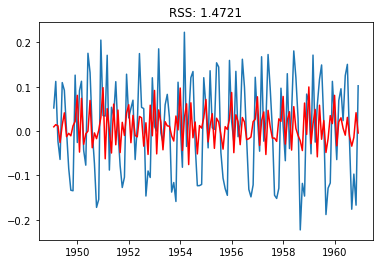

In [44]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(airline_log, order= (0,1,2))
results_AR = model.fit(disp = -1)
plt.plot(airplane_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-airplane_shift['#Passengers'])**2))
print('plotting AR model')

plotting MA model


/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


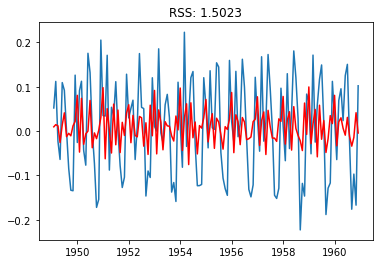

In [45]:
#MA model
model = ARIMA(airline_log, order= (2,1,0))
results_MA = model.fit(disp = -1)
plt.plot(airplane_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues-airplane_shift['#Passengers'])**2))
print('plotting MA model')

/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jyoti/anaconda3/envs/work/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


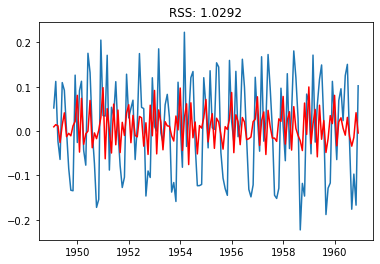

In [46]:
#greater the RSS the bad it is
#ARIMA model
model = ARIMA(airline_log, order= (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(airplane_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues-airplane_shift['#Passengers'])**2))
print('plotting ARIMA model')

In [47]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [48]:
#convert to cumulative SUM
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [49]:
predictions_ARIMA_log = pd.Series(airline_log['#Passengers'], index = airline_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846012
dtype: float64

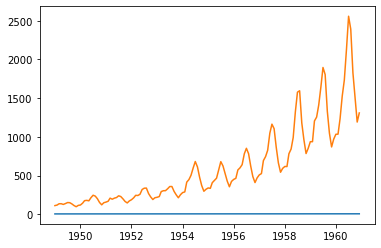

In [50]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(airline_log)
plt.plot(predictions_ARIMA)

In [51]:
airline_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


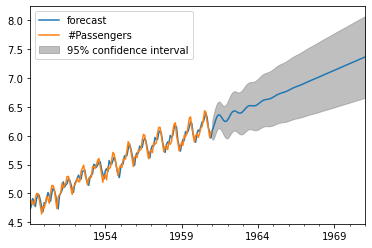

In [52]:
results_ARIMA.plot_predict(1,264)#144+120 = 264
x = results_ARIMA.forecast(steps = 120)#for 10 years I have predicted the value hence 10*12 = 120 